In [3]:
import pandas as pd 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
newsgroups=fetch_20newsgroups(subset='train')

In [29]:
newsgroups.keys()

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']

In [30]:
df=pd.DataFrame(newsgroups['data'], columns=['text'])

In [31]:
df

,text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...
6,From: bmdelane@quads.uchicago.edu (brian manni...
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...


In [32]:
print df.ix[5,0]

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

1. to lowercase

In [33]:
# v=TfidfVectorizer(stop_words='english', max_features=30)
# plot_tokens=v.fit_transform(movies_list['plot']).todense()
# plot_tokens=pd.DataFrame(plot_tokens, columns=v.get_feature_names())
# plot_tokens=plot_tokens.add_prefix('tokens_')

In [34]:
df['text_lower']=df['text'].str.lower()

In [140]:
count_vectorizer=CountVectorizer(
    stop_words='english',
    max_features=10000,
)

In [36]:
corpus_1=count_vectorizer.fit_transform(df.text_lower)

In [37]:
corpus_1

<11314x10000 sparse matrix of type '<type 'numpy.int64'>'
	with 1004156 stored elements in Compressed Sparse Row format>

In [38]:
tsvd=TruncatedSVD()

In [39]:
tsvd_word_data=tsvd.fit_transform(corpus_1)

In [40]:
tsvd_word_data.shape

(11314, 2)

It transformed 10,000 columns to 2!!!!!

In [26]:
tsvd_word_data[0:5,:]

array([[  1.17834551e-03,  -5.11609632e+00],
       [  1.52753858e-03,   1.70176308e-01],
       [  1.58567063e-03,   3.12104936e-01],
       [  2.44659360e-03,   2.56808115e-01],
       [  1.96677117e-03,   2.49392188e-01]])

In [47]:
targets = pd.DataFrame(newsgroups['target'], columns=['target_names'])
targets.head()
targets['target_names'].value_counts()

10    600
15    599
8     598
9     597
11    595
13    594
7     594
14    593
5     593
12    591
2     591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: target_names, dtype: int64

In [55]:
zip(range(0,21), newsgroups['target_names'])

[(0, 'alt.atheism'),
 (1, 'comp.graphics'),
 (2, 'comp.os.ms-windows.misc'),
 (3, 'comp.sys.ibm.pc.hardware'),
 (4, 'comp.sys.mac.hardware'),
 (5, 'comp.windows.x'),
 (6, 'misc.forsale'),
 (7, 'rec.autos'),
 (8, 'rec.motorcycles'),
 (9, 'rec.sport.baseball'),
 (10, 'rec.sport.hockey'),
 (11, 'sci.crypt'),
 (12, 'sci.electronics'),
 (13, 'sci.med'),
 (14, 'sci.space'),
 (15, 'soc.religion.christian'),
 (16, 'talk.politics.guns'),
 (17, 'talk.politics.mideast'),
 (18, 'talk.politics.misc'),
 (19, 'talk.religion.misc')]

In [61]:
y = targets['target_names'].apply(lambda x: 1 if x == 16 else 0)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_names, dtype: int64

In [62]:
y.loc

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [87]:
def tts_and_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    return rf.score(x_test, y_test)

In [88]:
tts_and_model(tsvd_word_data, y)

0.94904270986745209

In [89]:
tsvd_200=TruncatedSVD(n_components=200)
tsvd_200_words=tsvd_200.fit_transform(corpus_1)

In [90]:
tts_and_model(tsvd_200_words, y)

0.95522827687776146

In [91]:
electronics_y=targets['target_names'].apply(lambda x: 1 if x== 12 else 0)

In [92]:
print tts_and_model(tsvd_word_data, electronics_y)
print tts_and_model(tsvd_200_words, electronics_y)

0.940206185567
0.946391752577


In [94]:
print tts_and_model(tsvd_word_data, targets['target_names'])
print tts_and_model(tsvd_200_words, targets['target_names'])

0.0639175257732
0.231222385862


In [95]:
tsvd_2000=TruncatedSVD(n_components=2000)
tsvd_2000_words=tsvd_200.fit_transform(corpus_1)

In [96]:
print tts_and_model(tsvd_word_data, targets['target_names'])
print tts_and_model(tsvd_200_words, targets['target_names'])
print tts_and_model(tsvd_2000_words, targets['target_names'])

0.0695139911635
0.243298969072
0.249484536082


In [97]:
km=KMeans(n_clusters=2)

In [98]:
tsvd_word_data_standardized=StandardScaler().fit_transform(tsvd_word_data)

In [106]:
km.fit(tsvd_word_data_standardized)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [107]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [108]:
pd.Series(km.labels_).value_counts()

0    11303
1       11
dtype: int64

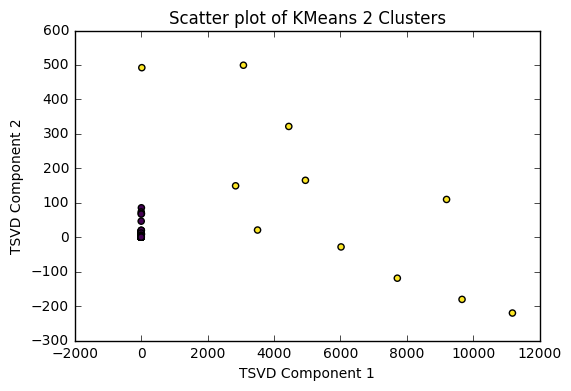

In [112]:
plt.scatter(tsvd_word_data[:,0], tsvd_word_data[:,1], c=km.labels_, cmap='viridis')
plt.xlabel('TSVD Component 1')
plt.ylabel('TSVD Component 2')
plt.title('Scatter plot of KMeans 2 Clusters')
plt.show()

In [129]:
def kmeans_and_graph(x, k):
    km=KMeans(n_clusters=k)
    km.fit(x)
    plt.figure(figsize=(20, 20))
    plt.scatter(x[:,0], x[:,1], c=km.labels_, cmap='viridis')
    plt.xlabel('TSVD Component 1')
    plt.ylabel('TSVD Component 2')
    plt.title('Scatter plot of KMeans 2 Clusters, %s clusters' % k)
    plt.show()
    
    
    plt.figure(figsize=(20, 20))
    plt.scatter(x[:,0], x[:,1], c=km.labels_, cmap='viridis', s=50)
    plt.xlim(-1, 3)
    plt.ylim(0, 20)
    plt.xlabel('TSVD Component 1')
    plt.ylabel('TSVD Component 2')
    plt.title('Scatter plot of KMeans 2 Clusters, %s clusters' % k)
    plt.show()

We can see visually that how many clusters is good for our model

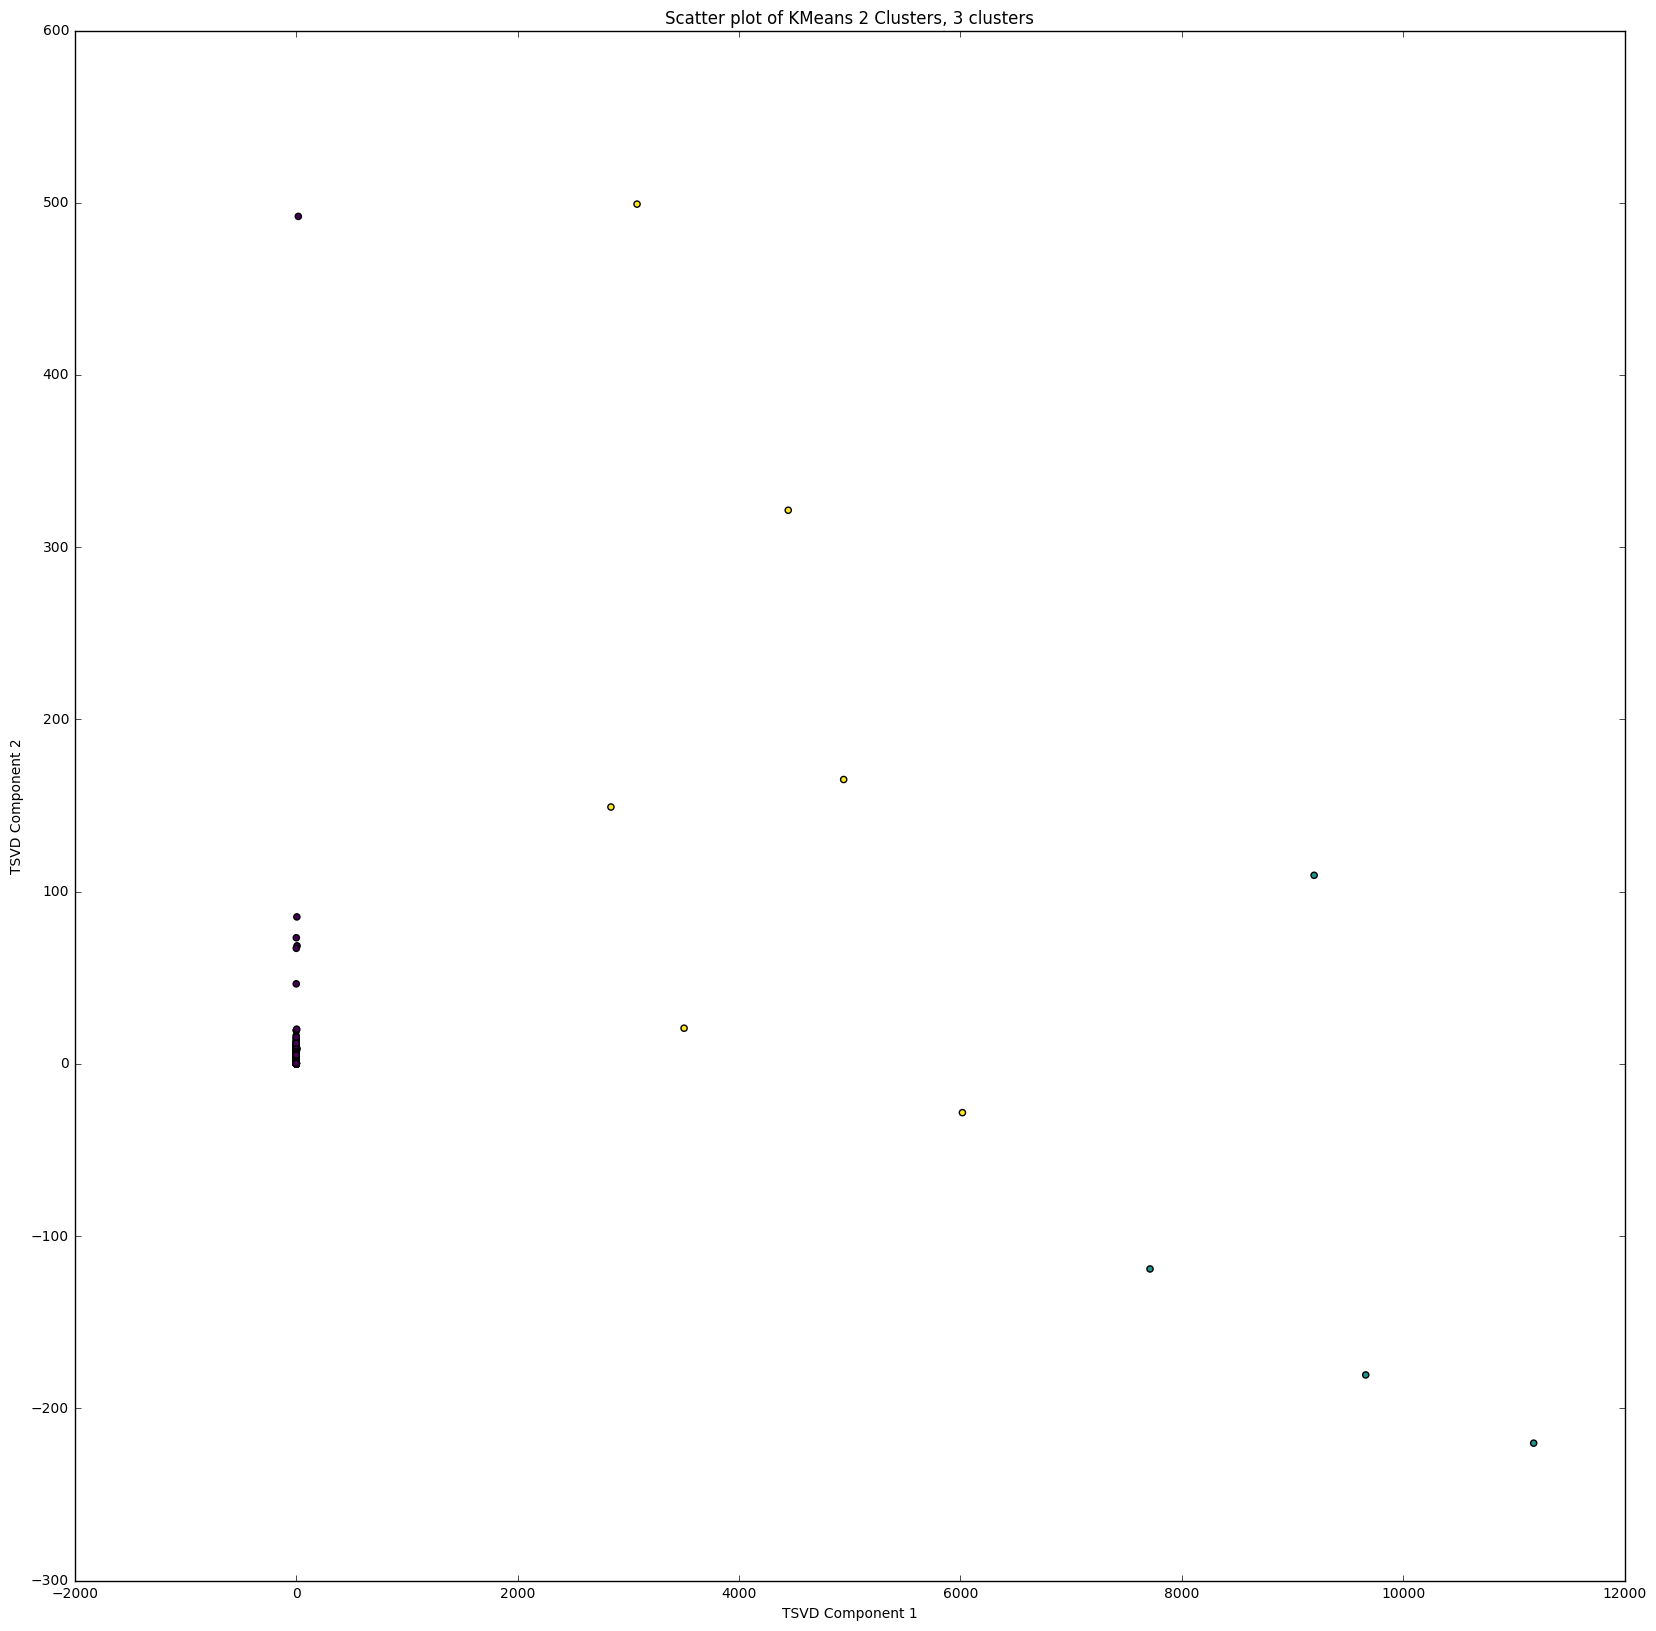

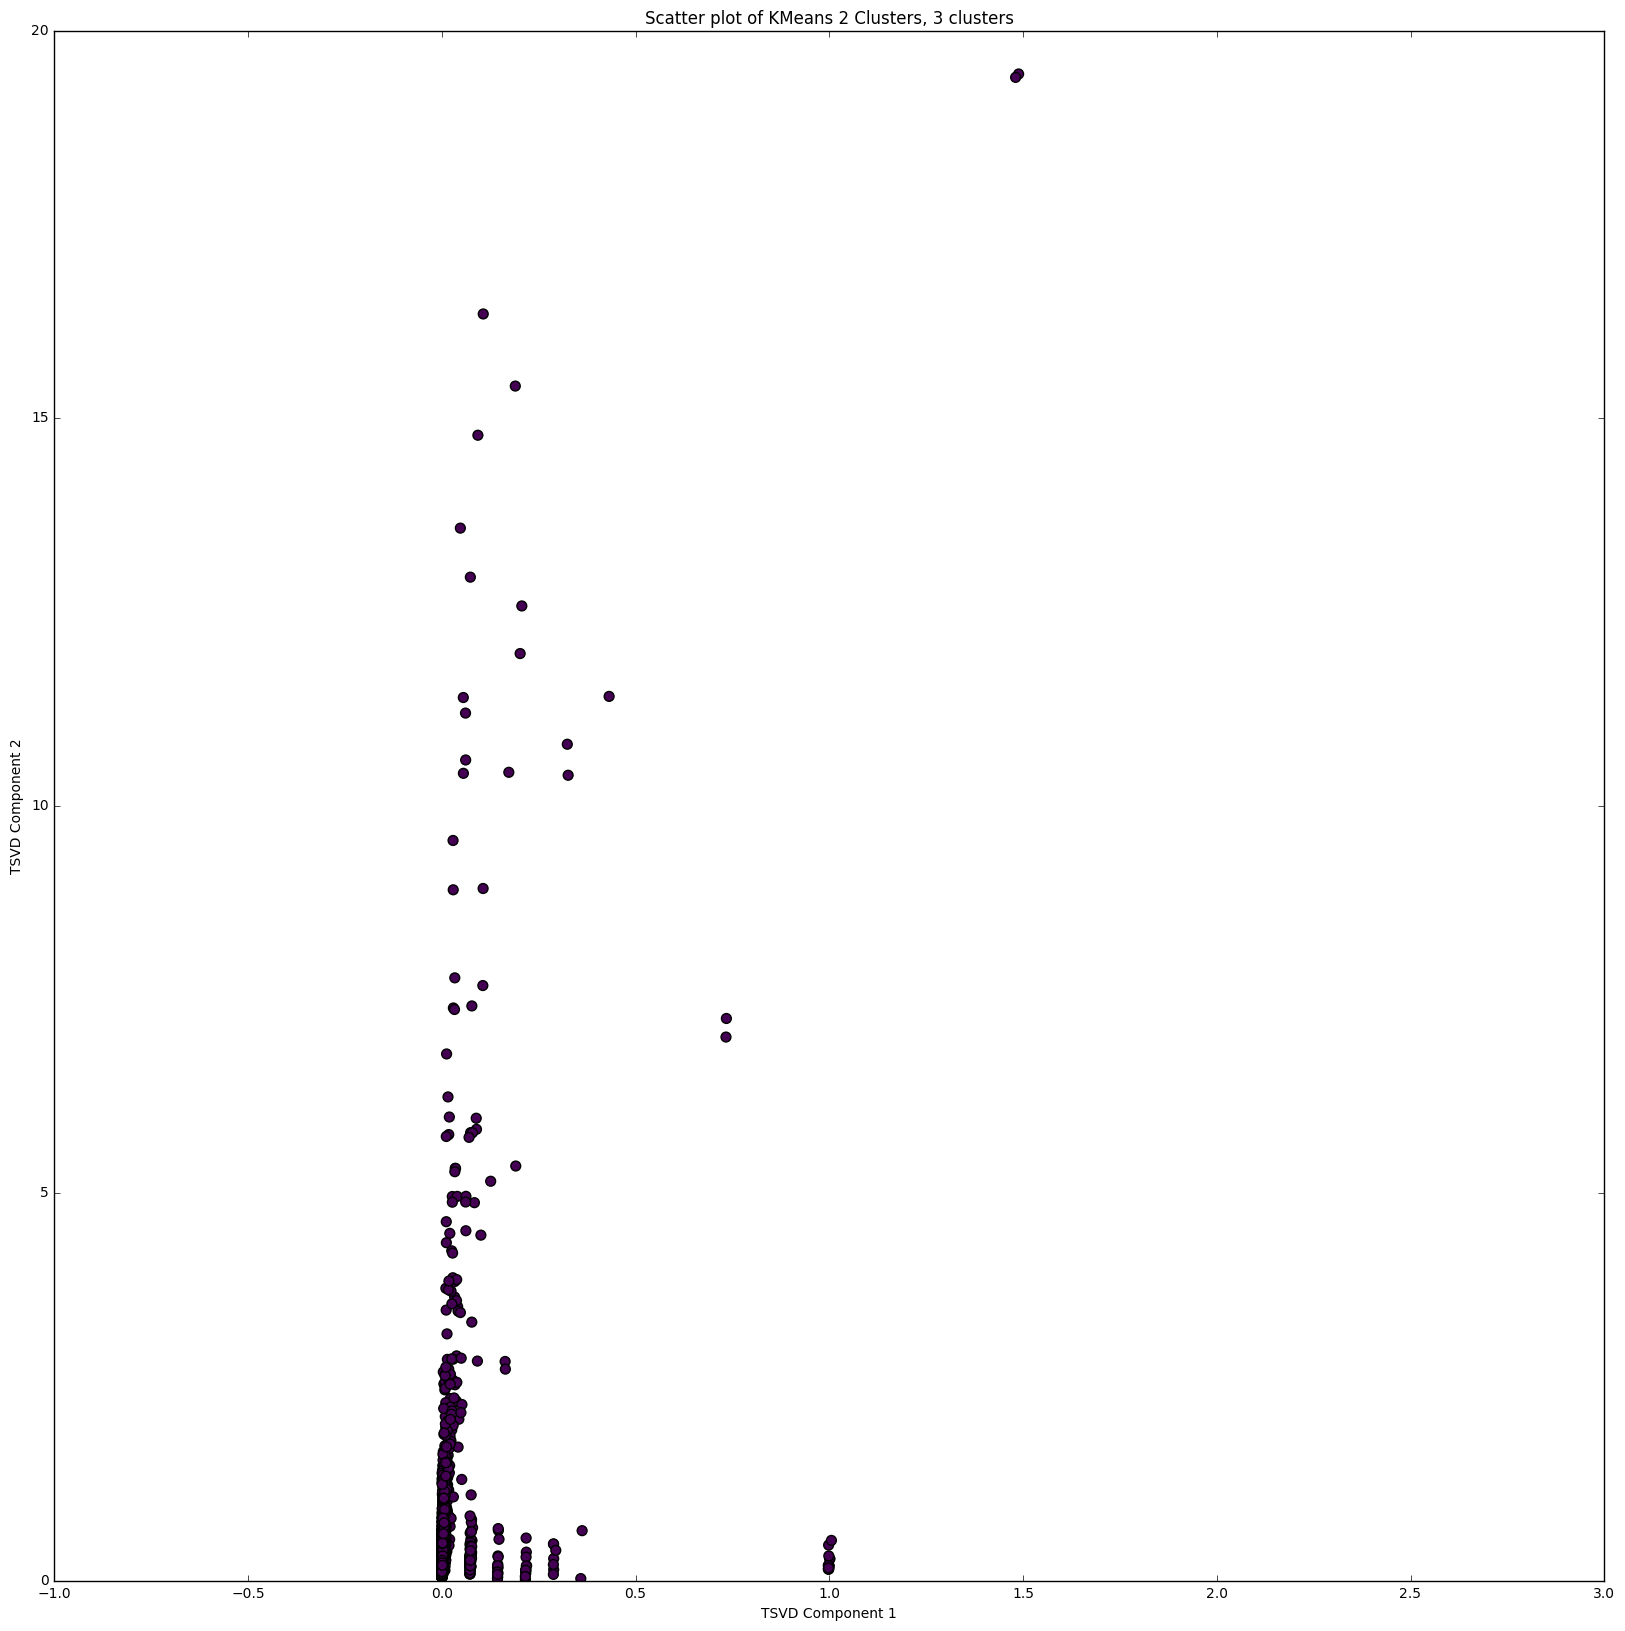

In [130]:
kmeans_and_graph(tsvd_word_data, 3)

In [146]:
def silhouette__selection(x, k):
    scores=[]
    for iteration in range(10, k):
        print 'I am on iteration %s' % iteration
        km=KMeans(n_clusters=iteration, n_jobs=-1)
        km.fit(x)
        scores.append((iteration, metrics.silhouette_score(x, km.labels_)))
    ks=[k[0] for k in scores]
    sils=[k[1] for k in scores]
    
    plt.plot(ks, sils)
    plt.ylabel('silhouette scores')
    plt.ylabel('K in Kmeans')
    plt.show()

I am on iteration 2
I am on iteration 3
I am on iteration 4
I am on iteration 5
I am on iteration 6
I am on iteration 7
I am on iteration 8
I am on iteration 9
I am on iteration 10
I am on iteration 11
I am on iteration 12
I am on iteration 13
I am on iteration 14
I am on iteration 15
I am on iteration 16
I am on iteration 17
I am on iteration 18
I am on iteration 19
I am on iteration 20
I am on iteration 21
I am on iteration 22
I am on iteration 23
I am on iteration 24
I am on iteration 25


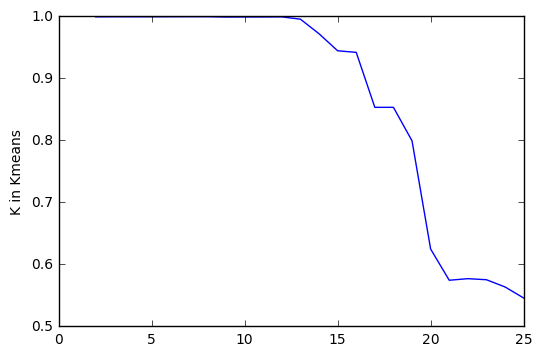

In [134]:
silhouette__selection(tsvd_word_data, 26)

In [137]:
count_vectorizer_all=CountVectorizer(
    stop_words='english',
)

In [138]:
corpus_2=count_vectorizer.fit_transform(df.text_lower)

In [139]:
corpus_2

<11314x10000 sparse matrix of type '<type 'numpy.int64'>'
	with 1004156 stored elements in Compressed Sparse Row format>

In [141]:
tv=TruncatedSVD()
tsvd_all_words=tv.fit_transform(corpus_2)

In [144]:
tsvd_all_words[0:5]

array([[  1.17834552e-03,   1.99295438e+00],
       [  1.52753858e-03,   2.07207152e-01],
       [  1.58567063e-03,   3.45158445e-01],
       [  2.44659360e-03,   2.79542818e-01],
       [  1.96677117e-03,   2.78514560e-01]])

I am on iteration 10
I am on iteration 11
I am on iteration 12
I am on iteration 13
I am on iteration 14
I am on iteration 15
I am on iteration 16
I am on iteration 17
I am on iteration 18
I am on iteration 19
I am on iteration 20
I am on iteration 21
I am on iteration 22
I am on iteration 23
I am on iteration 24
I am on iteration 25


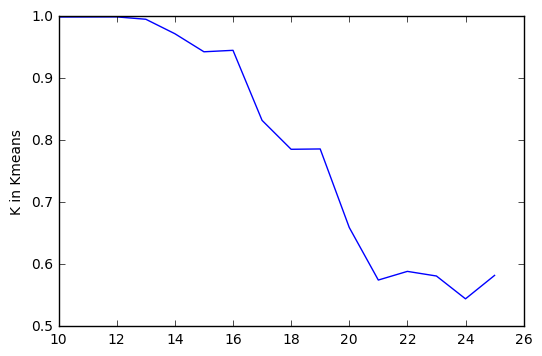

In [147]:
silhouette__selection(tsvd_all_words, 26)

In [164]:
news=pd.DataFrame(newsgroups['target'], columns=['labels'])
news.head()

,labels
0,7
1,4
2,4
3,1
4,14


In [165]:
def text_label(values):
    return newsgroups['target_names'][values]


In [166]:
print text_label(16)

talk.politics.guns


In [167]:
news['text_label']=news['labels']

In [168]:
final_model=KMeans(n_clusters=20)
scaled=StandardScaler().fit_transform(tsvd_all_words)
final_model.fit(tsvd_all_words)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [169]:
news=news.join(pd.DataFrame(final_model.labels_, columns=['predicted_group']))

In [170]:
news['predicted_group'].value_counts()

0     9304
19    1830
17     107
14      35
13      16
16       6
12       3
10       1
8        1
1        1
9        1
2        1
15       1
18       1
7        1
11       1
4        1
5        1
6        1
3        1
Name: predicted_group, dtype: int64

In [171]:
news.groupby('predicted_group')['text_label'].value_counts()

predicted_group  text_label
0                8             547
                 12            530
                 1             516
                 3             514
                 4             513
                 5             512
                 13            512
                 6             510
                 7             509
                 9             495
                 10            482
                 14            475
                 2             468
                 11            459
                 15            439
                 17            408
                 16            396
                 0             391
                 18            332
                 19            296
1                2               1
2                2               1
3                2               1
4                2               1
5                2               1
6                2               1
7                2               1
8                2         

In [173]:
for x in range(0, 5):
    print df.iloc[x,1]

from: lerxst@wam.umd.edu (where's my thing)
subject: what car is this!?
nntp-posting-host: rac3.wam.umd.edu
organization: university of maryland, college park
lines: 15

 i was wondering if anyone out there could enlighten me on this car i saw
the other day. it was a 2-door sports car, looked to be from the late 60s/
early 70s. it was called a bricklin. the doors were really small. in addition,
the front bumper was separate from the rest of the body. this is 
all i know. if anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

thanks,
- il
   ---- brought to you by your neighborhood lerxst ----





from: guykuo@carson.u.washington.edu (guy kuo)
subject: si clock poll - final call
summary: final call for si clock reports
keywords: si,acceleration,clock,upgrade
article-i.d.: shelley.1qvfo9innc3s
organization: university of washington
lines: 11
nntp-posting-host: carson.u.wa

In [176]:
df['stripped_marks']=df.text_lower.str.replace('>', '')
df['stripped_marks']=df.text_lower.str.replace('subject', '')
df['stripped_marks']=df.text_lower.str.replace('from', '')
df['stripped_marks']=df.text_lower.str.replace('lines', '')

In [207]:
def strip_lines(text):
    output=""
    for line in text.splitlines():
        if (("from:" not in line) and 
            ("subject:" not in line) and 
            ("from article" not in line) and 
            ("in article" not in line) and 
            ("lines:" not in line) and 
            ("distribution:" not in line) and 
            ("organization:" not in line)):
            output += line
    output=output.replace('>', '')
    return output

In [208]:
df['stripped_marks']=df.text_lower.apply(strip_lines)

In [210]:
corpus_3=count_vectorizer.fit_transform(df.stripped_marks)